In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

In [3]:
mae.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
2728,MAE,MAE 1,"Bahadori, Mohammad Yousef",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2729,MAE,MAE 1,"Linden, Paul F.",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2730,MAE,MAE 1,"Nagy, Geza",FA07,213,119,63.2,79.3,3.96,3.27,2.87
2731,MAE,MAE 101A,"Bahadori, Mohammad Yousef",FA14,55,25,96.0,96.0,6.42,3.13,2.36
2732,MAE,MAE 101A,"Bahadori, Mohammad Yousef",S112,50,13,92.3,84.6,9.58,3.23,2.69


                    Rcmnd Instr  Avg Grade Received
Rcmnd Instr            1.000000            0.248562
Avg Grade Received     0.248562            1.000000


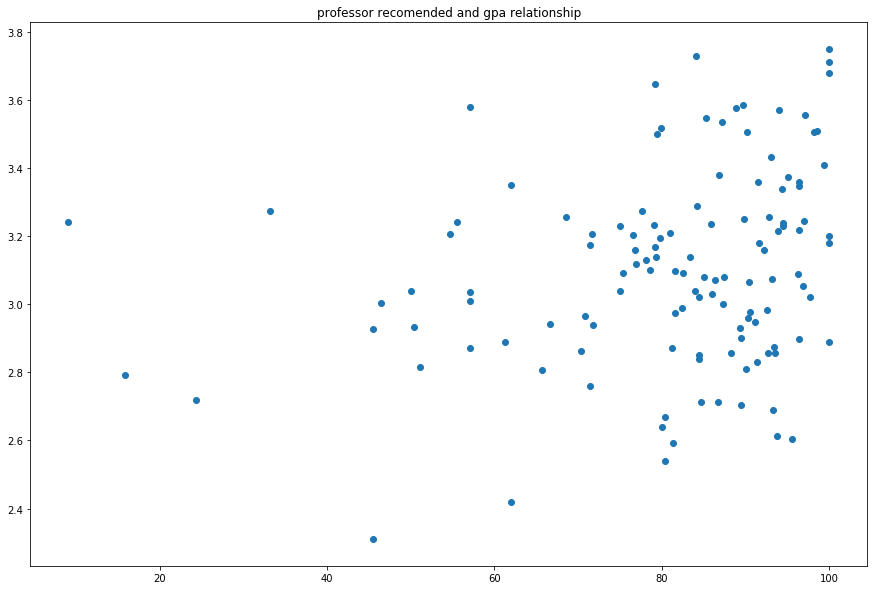

In [4]:
unique_prof = mae.groupby(by='Instructor')['Rcmnd Instr','Avg Grade Received'].mean().sort_values(by='Rcmnd Instr')
rmnd_prof = unique_prof['Rcmnd Instr'].values
gpa = unique_prof['Avg Grade Received'].values
#for i in range(gpa.shape[0]):
#    print(rmnd_prof[i], gpa[i])
#print(unique_prof['Avg Grade Received'].values)
corr = unique_prof.corr(method='pearson')
print(corr)
plt.figure(figsize=(15,10))
plt.scatter(unique_prof['Rcmnd Instr'].values, unique_prof['Avg Grade Received'].values)
plt.title('professor recomended and gpa relationship')
plt.show()